# How To: Building Interactive Dashboards

An important part of modelling is to modify values on-the-fly, interactively with the customer. The API function ``bptk.dashboard`` has this functionality. It comes with a field "constants" that contains a list of widget definitions. Each widget is defined using a tuple.
The structure is:  ``("widget_type","name.of.constant",start_value,maximum_value)``. This allows you to see the results of the simulations instantly without having to re-run the simulation manually. See a working example in the following plot.

## Widgets That Are Currently Supported

Currently, BPTK-Py supports the following widgets:

* **sliders**: Sliders allow you to select a value in an interval. Use "slider" as ``widget_type``. A slider requires ``start_value and maximum_value``. You may use one more value to specify the step size of the slider as a floating point number (optional). If not specified, the slider will use a precision of two decimal places (0.1). Example: ``("slider",'initialOpenTasks',100.0,1000.0,0.01)``.
* **checkbox**: If you want a checkbox, use "checkbox" as ``widget_type``. You do not have to supply ``start_value / maximum_value``. Example: ``("checkbox","initialStaff")``
* **timerange**: This will give you a slider in which you can select time intervals within the graph to "zoom in/out" of certain parts of the graph. It gives you the power to further look into certain simulation periods. It is enough to just add the keyword "timerange" as ``widget_type``.

## Using Widgets To Modify A Model

It is important to mention that everytime you move a slider/checkbox, the underlying model equations are modified. This means, the results of the scenario will also deviate in other plots of the same scenario. You may reuse the modifications to the model in further plots. If this is not what you want,
a quick workaround is to initiliaze another instance of BPTK_Py and run the ``dashboard`` function independently from the other instance(s).

In [1]:
from BPTK_Py.bptk import bptk
bptk = bptk()
bptk.dashboard(scenario_managers=["smSimpleProjectManagement"],
                                scenarios=["scenario100"],
                                kind="area",
                                equations=["openTasks","closedTasks"],
                                stacked=False,
                                strategy=False,
                                freq="D",
                                start_date="1/1/2017",
                                title="Interactive Plotting",
                                x_label="Date",
                                y_label="Open / Closed Tasks",
                                constants=[
                                    ("slider",'deadline',0.0,1000.0),
                                    ("slider","effortPerTask",0.0001,1.0,0.0001),("timerange")]
                                )


interactive(children=(FloatSlider(value=500.0, continuous_update=False, description='deadline', layout=Layout(…

## Using PULSE Functions
 
A PULSE function sets a variable to a specified value for exactly one step in the situation. This is useful for simulating regular actions like a TV campaign in every 4th week of the simulation.

To create the widget, use the ``pulse_function_create(scenario_managers=[...],scenarios=[...]`` function! By now, you should be familiar with the notation :-)

The image above shows how to use the feature. First, select the variable you would like to apply the PULSE function to. Then configure the initial value. This value is the standard value that is active throughout all periods apart from the pulse moments. In the example it is 100. Next, we configure the value for the pulse periods, here 200.
The other settings are the frequency (10) and the first time the function triggers.

If you deactivate the checkbox "Keep existing strategy", all previously created PULSE functions will be deleted and only the __one__ you create now, will be stored. 

The function in the example sets ``deadline`` to 1 for t=10, 20, 30 and so on.

You may also define multiple PULSE functions for variables. After defining the functions, you can plot the scenario(s) using the ``plot_scenarios`` function. Note that for plotting, we use the ``strategy`` flag as we only modify the execution strategy. More on strategies in the following section.

Try out yourself:

__Note:__ To avoid interference of model changes with the main instance of BPTK_PY, we instantiate another one named ``bptk_pulse``. 

In [2]:
import BPTK_Py
bptk_pulse = BPTK_Py.bptk()
bptk_pulse.pulse_function_create(scenarios=["scenario100","scenario80"],
                                 scenario_managers=["smSimpleProjectManagement"])

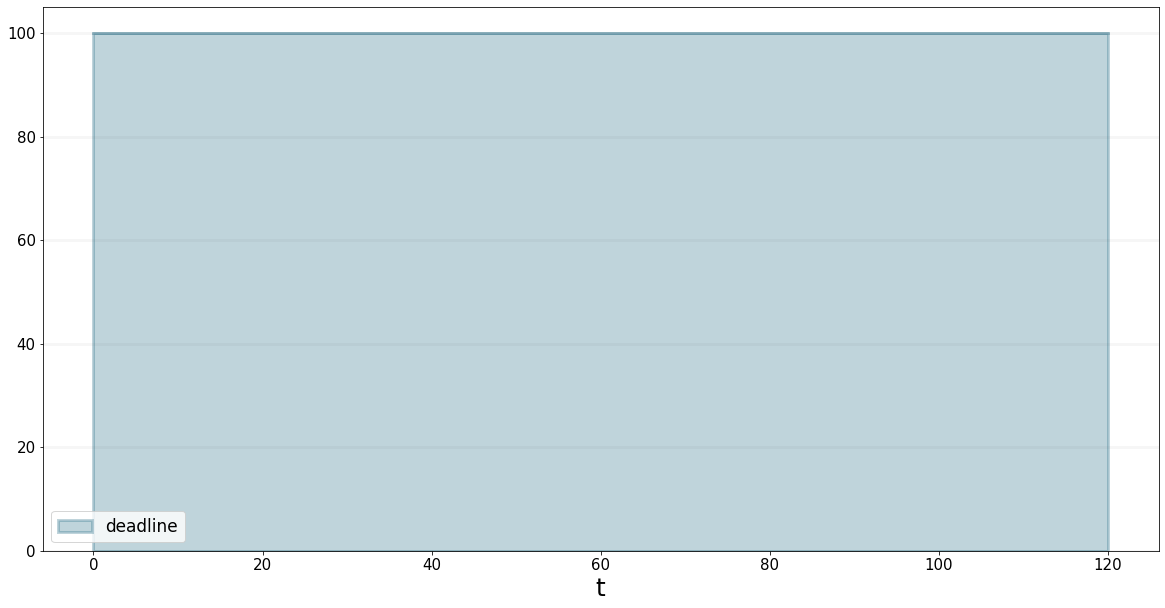

In [3]:
bptk_pulse.plot_scenarios(scenarios=["scenario80"],
                    strategy=True,
                    scenario_managers=["smSimpleProjectManagement"],
                    equations=["deadline"]
                    )
